In [4]:
import pandas as pd
import numpy as np
import time
from src.peblMl import *
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
from pandas_ml import ConfusionMatrix as CM2
from sklearn.metrics import classification_report

In [21]:
%%time
data_start=pd.read_pickle('data/wikiNews.pkl')
data_train=data_start[:3000]
data_test=data_start[3000:]
data_test=data_test[data_test['topic'].isin(['политика', 'россия', 'европа', 'футбол', 'спорт', 'астрономия', 'other'])]
#data_train=data_train[~data_train['topic'].isin(['other'])]
data_train=data_train[data_train['topic'].isin(['политика', 'россия', 'европа', 'футбол', 'спорт', 'астрономия'])]
print (len(data_test), len(data_train))
print ('Train Data: \n', data_train['topic'].value_counts())
print ('Test Data: \n', data_test['topic'].value_counts())

7606 831
Train Data: 
 политика      376
россия        219
европа        125
спорт          62
астрономия     28
футбол         21
Name: topic, dtype: int64
Test Data: 
 other         7353
политика        79
россия          78
спорт           40
европа          26
футбол          24
астрономия       6
Name: topic, dtype: int64
Wall time: 137 ms


In [22]:
d_t=data_test[~data_test['topic'].isin(['other'])]
print (len(d_t), len(data_train))

253 831


In [23]:
data_train.head()

,Noun,Text,category,topic,date_news
1520,ангел меркель германия германия женщина правит...,ангела меркель канцлер германии германия она п...,ангела_меркель христианско_демократический_сою...,политика,2005-11-01
1527,атака ноябрь страница атака домен машина гугл ...,атака гугл данным компании ноября предпринята ...,google швейцария европа интернет хакерские_ата...,европа,2005-11-01
1531,ограничение технология доставка мкс состояние ...,ограничения закупку космических технологий кос...,космонавтика мкс политика_сша джордж_уокер_буш...,политика,2005-11-01
1548,грунт астероид агентство цель миссия зонд хайя...,межпланетный зонд пробы грунта поверхности аст...,япония астрономия астероиды,астрономия,2005-11-01
1588,штайнмайер время встреча министр wсша wкондоли...,визит штайнмайера сша сшаво время встречи новы...,германия сша политика кондолиза_райс цру,политика,2005-11-01


In [24]:
%%time
modelML=peblMl()
modelML.fit(data_train['Noun'].tolist(), data_train['topic'].tolist())

Wall time: 210 ms


In [25]:
ar_avg_prob=modelML.ProbTopicWord


In [26]:
print (len(np.amax(ar_avg_prob, axis=1)), len(np.amax(ar_avg_prob, axis=0)))

6 9144


In [27]:
print (np.amax(ar_avg_prob, axis=1), np.average(np.amax(ar_avg_prob, axis=1)), np.median(np.amax(ar_avg_prob, axis=1)))

[0.999001   0.99966678 0.99961553 0.99937539 0.99944475 0.99960016] 0.9994506020768901 0.9995224564255363


In [28]:
modelML.predict(data_train['Noun'].tolist()[11], 'newTopic')[:10]

политика      0.855670
россия        0.083699
спорт         0.044642
европа        0.008166
футбол        0.007823
астрономия    0.000000
newTopic      0.000000
dtype: float64

In [29]:
%%time
topicValueResult=pd.DataFrame(columns=['topicName', 'probValue', 'realTopic'])
goodT=0
wrongT=0
i=0
for testRow in data_test['Noun'].tolist():
    result=modelML.predict(testRow, 'other')[:1]
    topicValueResult=topicValueResult.append({'topicName': result.index[0], 'probValue': result.values[0], 
                                             'realTopic': data_test['topic'][i]}, ignore_index=True)
    if result.index[0]!='other' and data_test['topic'][i]!='other':
        #print (result.index[0], result.values[0], data_test['topic'][i])
        goodT+=1
    if data_test['topic'][i]!='other' and result.index[0]=='other':
        wrongT+=1
    i+=1
    #if i%10==0:
    #    print (result.index[0], result.values[0])


Wall time: 1min 4s


In [30]:
print (wrongT, goodT)

72 181


In [31]:
topicValueResult.head() 

,topicName,probValue,realTopic
0,other,0.428798,other
1,политика,0.374740,other
2,other,0.421554,other
3,политика,0.447759,other
4,other,0.373142,other


In [32]:
topicValueResult['topicName'].value_counts()

политика      3818
other         3389
россия         226
европа         117
астрономия      27
спорт           24
футбол           5
Name: topicName, dtype: int64

In [33]:
topicValueResult['realTopic'].value_counts()

other         7353
политика        79
россия          78
спорт           40
европа          26
футбол          24
астрономия       6
Name: realTopic, dtype: int64

In [34]:
topicValueResult.groupby(['topicName']).sum()

,probValue
topicName,
other,1416.008297
астрономия,8.616820
европа,35.424305
политика,1516.279628
россия,67.395497
спорт,6.932128
футбол,1.592192


Topic 
 OrderedDict([('cm', Predicted   other  астрономия  европа  политика  россия  спорт  футбол  \
Actual                                                                   
other        3317          25     113      3667     208     18       5   
астрономия      2           2       0         2       0      0       0   
европа         14           0       1         8       3      0       0   
политика        5           0       1        72       1      0       0   
россия         18           0       0        46       9      5       0   
спорт          21           0       0        16       3      0       0   
футбол         12           0       2         7       2      1       0   
__all__      3389          27     117      3818     226     24       5   

Predicted   __all__  
Actual               
other          7353  
астрономия        6  
европа           26  
политика         79  
россия           78  
спорт            40  
футбол           24  
__all__        7606  ), ('overall

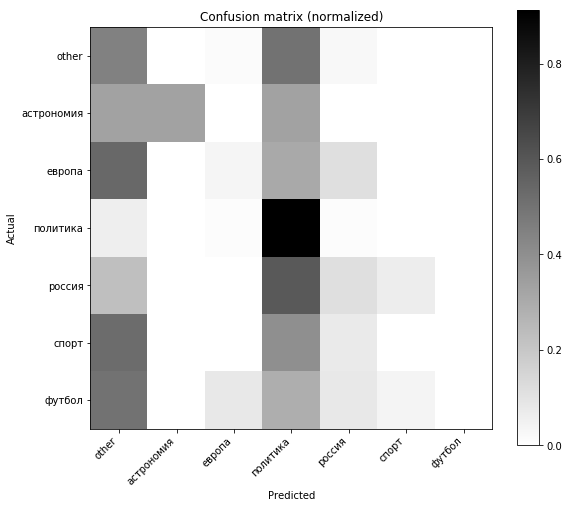

             precision    recall  f1-score   support

   политика       0.02      0.91      0.04        79
     россия       0.04      0.12      0.06        78
     европа       0.01      0.04      0.01        26
     футбол       0.00      0.00      0.00        24
      спорт       0.00      0.00      0.00        40
 астрономия       0.07      0.33      0.12         6
      other       0.98      0.45      0.62      7353

avg / total       0.95      0.45      0.60      7606



In [36]:
print ('Topic \n', CM2(topicValueResult['realTopic'], topicValueResult['topicName']).stats())
CM2(topicValueResult['realTopic'], topicValueResult['topicName']).plot(normalized=True)
plt.show()
print(classification_report(topicValueResult['realTopic'], topicValueResult['topicName'], labels=['политика', 'россия', 'европа', 'футбол', 'спорт', 'астрономия', 'other']))
